# FINAL PROJECT INTRO TO DATA SCIENCE 2021-2022

###  By: Eliel Yeshayahu and Shimon Turchak

In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

import seaborn as sns
import warnings
import requests
warnings.filterwarnings("ignore")
from bs4 import BeautifulSoup

# sklearn imports
from sklearn import linear_model
from sklearn import metrics




# SCRAPING:

In this section we scrape data from a website named: Metacritics.
This site reviews and grades released video games. It has done so for many years so we decided to use it.
We took most games from this website and created a Data Frame.
Not all the data is presented in the first page so we had to use crawling and open the inner page to reach more data.

In [7]:


#creating list for each column

names = []
release_dates = []
amount_of_platformss = []
platforms = []
meta_scores = []
user_scores = []
summeries = []
amount_of_meta_criticss = []
devs =[]
all_genres = []
publishers = []

urls=[]
base_url = "https://www.metacritic.com";

#scraping and crawling 40 pages
a = 0
for j in range(50):
    print("PAGE : " + str(j) + "------------")
    x = "https://www.metacritic.com/browse/games/score/metascore/all/pc/filtered?page=" + str(j)
    user_agent = {'User-agent': 'Mozilla/5.0'}
    response = requests.get(x , headers = user_agent);
    soup = BeautifulSoup(response.content,'html.parser')
    all_games = soup.find_all("tr")
    for i in range(200):
        #the site has data only in the even number of table rows so we skipped the irrelevant ones
        if i%2 != 0:
            continue;
          
        print(a)
        #scraping data from the list
        name=all_games[i].find_all("a", class_="title")[0].get_text().strip()
        release_date=all_games[i].find_all("div" , class_="clamp-details")[0].find_all("span")[2].get_text().strip()
        platform=all_games[i].find_all("div" , class_="clamp-details")[0].find_all("span")[1].get_text().strip()
        meta_score=all_games[i].find_all("a")[1].get_text().strip()
        user_score=all_games[i].find_all("a")[4].get_text().strip()
        summery = all_games[i].find_all("div" )[4].get_text().strip()
        
        #crawling into the innerpage for each video-game
        next_url = base_url + all_games[i].find_all("a")[2]['href'].strip()
        html = requests.get(next_url , headers = user_agent);
        next_soup = BeautifulSoup(html.content,'html.parser')
        
        #scraping data from inner page
        if html.status_code != 404:
            amount_of_meta_critics = next_soup.find("div" , class_="summary")
            if amount_of_meta_critics:
                amount_of_meta_critics = amount_of_meta_critics.find("a").find("span").get_text().strip()
            else:
                amount_of_meta_critics = "0"
            
            dev_div = next_soup.find("li" , class_="summary_detail developer")
            if dev_div:
                developer = dev_div.find_all("span")[1].get_text().strip()
            else:
                developer = "?"
            
            #genres
            genres_div = next_soup.find("li" , class_="summary_detail product_genre")
            genre = ""
            if genres_div:
                genres = genres_div.find_all("span" , class_="data")
                for i in genres:
                    genre = genre + i.get_text() + ","    
                genre = genre[:-1]

            also_on = next_soup.find("li" , class_="summary_detail product_platforms")
            if also_on:
                amount_of_platforms = len(also_on.find_all('a'))+1
            else:
                amount_of_platforms = 1 
            #creatng a list of genres for each game
            
            
            publisher_div = next_soup.find("li" , class_="summary_detail publisher");
            if publisher_div:
                publisher = publisher_div.find("a").get_text().strip()
            else:
                publisher = "?"
        else:
            amount_of_meta_critics="0"
            developer = "?"
            genre = "?"
            amount_of_platforms= 1

        #adding all data to the lists
        names.append(name)
        release_dates.append(release_date)
        platforms.append(platform)
        meta_scores.append(meta_score)
        user_scores.append(user_score)
        summeries.append(summery)
        #innerpage
        amount_of_meta_criticss.append(amount_of_meta_critics)
        devs.append(developer)
        publishers.append(publisher)
        all_genres.append(genre);
        amount_of_platformss.append(amount_of_platforms)
        a = a+1


In [8]:
#df is the data frame that contains all the data we scraped
df = pd.DataFrame(data = {
    "name" : names , 
    "release_dates" : release_dates , 
    "platforms":platforms , 
    "meta_scores" : meta_scores , 
    "user_scores" : user_scores , 
    "summeries" : summeries , 
    "num_meta_critics" : amount_of_meta_criticss , 
    "developer" : devs , 
    "publisher" : publishers ,
    "amount_of_platforms" : amount_of_platformss , 
    "all_genres" : all_genres})
df
#11

,name,release_dates,platforms,meta_scores,user_scores,summeries,num_meta_critics,developer,publisher,amount_of_platforms,all_genres
0,Disco Elysium: The Final Cut,"March 30, 2021",PC,97,8.2,Disco Elysium - The Final Cut is the definitiv...,11,ZA/UM,ZA/UM,8,"Role-Playing,General,Western-Style"
1,Half-Life 2,"November 16, 2004",PC,96,9.2,[Metacritic's 2004 PC Game of the Year] By ta...,81,Valve Software,VU Games,1,"Action,Shooter,Shooter,First-Person,Sci-Fi,Sci..."
2,Grand Theft Auto V,"April 13, 2015",PC,96,7.8,Los Santos: a sprawling sun-soaked metropolis ...,57,Rockstar North,Rockstar Games,7,"Modern,Action Adventure,Open-World"
3,The Orange Box,"October 10, 2007",PC,96,9.1,Games included in The Orange Box compilation: ...,34,Valve Software,EA Games,3,"Action,Miscellaneous,Shooter,Compilation,First..."
4,Half-Life,"November 19, 1998",PC,96,9.1,Half-Life combines great storytelling in the t...,24,Valve Software,Sierra Entertainment,2,"Action,Shooter,Shooter,First-Person,Sci-Fi,Sci..."
...,...,...,...,...,...,...,...,...,...,...,...
4995,Seduce Me,"January 2, 2013",PC,41,3.3,Having happened upon an invite to a wealthy so...,12,?,No Reply Games,1,"Strategy,General,General"
4996,Brigade E5: New Jagged Union,"October 17, 2006",PC,41,6.8,Brigade E5: New Jagged Union is set in the fic...,9,Apeiron,Strategy First,1,"Strategy,Turn-Based,Modern,General,Modern"
4997,Mall Tycoon,"February 3, 2002",PC,41,4.8,"Every mall goer's ideal simulation. Design, bu...",10,"Holistic Design, Inc.",Take-Two Interactive,1,"Strategy,Tycoon,Management,Tycoon,Business / T..."
4998,4PM,"July 9, 2014",PC,41,4.2,"4PM is a short, narrative driven game, made by...",7,Bojan Brbora,4PM GAME,1,"Adventure,General,3D,First-Person"


In [9]:
df.to_csv("./big_df.csv")

## PROCESSING
After getting all the games we wanted to separate the genred column into binary columns of the main genres.
Each new column represents whether the game is from a specific category.
We checked each game's genres for a specific word to achieve this.

In [10]:
# seperating genres
#note that those are not all the genres we just took the main ones
action_game = []
general_game = []
rpg_game =[]
open_world_game =[]
survival_game= []
shooter_game=[]
point_and_click_game =[]
strategy_game =[]
sports_game =[]
racing_game =[]


#checking if a word is in the string that describes all genres
#if yes append one, otherwise add 0
for i in df.all_genres:
    if("Action" in i):
        action_game.append(1)
    else:
        action_game.append(0)
        
    if("General" in i):
        general_game.append(1)
    else:
        general_game.append(0)
    
    if("Role-Playing" in i or "RPG" in i):
        rpg_game.append(1)
    else:
        rpg_game.append(0)
    
    if("Open-World" in i):
        open_world_game.append(1)
    else:
        open_world_game.append(0)
        
    if("Survival" in i):
        survival_game.append(1)
    else:
        survival_game.append(0)
    
    if("Shooter" in i):
        shooter_game.append(1)
    else:
        shooter_game.append(0)
        
    if("Point-and-Click" in i):
        point_and_click_game.append(1)
    else:
        point_and_click_game.append(0)
        
    if("Sports" in i):
        sports_game.append(1)
    else:
        sports_game.append(0)
        
    if("Strategy" in i):
        strategy_game.append(1)
    else:
        strategy_game.append(0)
    if("Racing" in i):
        racing_game.append(1)
    else:
        racing_game.append(0)


### This is how the new columns look like:

In [11]:
df["is_action"] = action_game
df["is_general"] = general_game
df["is_rpg"] = rpg_game
df["is_open_world"] = open_world_game
df["is_survival"] = survival_game
df["is_shooter"] = shooter_game
df["is_point_and_click"] = point_and_click_game
df["is_strategy"] = strategy_game
df["is_sports"] = sports_game
df["is_racing"] = racing_game

#showing the new columns
df[['is_action' ,'is_general' , "is_rpg" , "is_open_world", "is_survival", "is_shooter", "is_point_and_click", "is_strategy", "is_sports" , "is_racing"]]

,is_action,is_general,is_rpg,is_open_world,is_survival,is_shooter,is_point_and_click,is_strategy,is_sports,is_racing
0,0,1,1,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4995,0,1,0,0,0,0,0,1,0,0
4996,0,1,0,0,0,0,0,1,0,0
4997,0,0,0,0,0,0,0,1,0,0
4998,0,1,0,0,0,0,0,0,0,0


### This is how the whole Data Frame looks like:

In [12]:
df

,name,release_dates,platforms,meta_scores,user_scores,summeries,num_meta_critics,developer,publisher,amount_of_platforms,...,is_action,is_general,is_rpg,is_open_world,is_survival,is_shooter,is_point_and_click,is_strategy,is_sports,is_racing
0,Disco Elysium: The Final Cut,"March 30, 2021",PC,97,8.2,Disco Elysium - The Final Cut is the definitiv...,11,ZA/UM,ZA/UM,8,...,0,1,1,0,0,0,0,0,0,0
1,Half-Life 2,"November 16, 2004",PC,96,9.2,[Metacritic's 2004 PC Game of the Year] By ta...,81,Valve Software,VU Games,1,...,1,0,0,0,0,1,0,0,0,0
2,Grand Theft Auto V,"April 13, 2015",PC,96,7.8,Los Santos: a sprawling sun-soaked metropolis ...,57,Rockstar North,Rockstar Games,7,...,1,0,0,1,0,0,0,0,0,0
3,The Orange Box,"October 10, 2007",PC,96,9.1,Games included in The Orange Box compilation: ...,34,Valve Software,EA Games,3,...,1,0,0,0,0,1,0,0,0,0
4,Half-Life,"November 19, 1998",PC,96,9.1,Half-Life combines great storytelling in the t...,24,Valve Software,Sierra Entertainment,2,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Seduce Me,"January 2, 2013",PC,41,3.3,Having happened upon an invite to a wealthy so...,12,?,No Reply Games,1,...,0,1,0,0,0,0,0,1,0,0
4996,Brigade E5: New Jagged Union,"October 17, 2006",PC,41,6.8,Brigade E5: New Jagged Union is set in the fic...,9,Apeiron,Strategy First,1,...,0,1,0,0,0,0,0,1,0,0
4997,Mall Tycoon,"February 3, 2002",PC,41,4.8,"Every mall goer's ideal simulation. Design, bu...",10,"Holistic Design, Inc.",Take-Two Interactive,1,...,0,0,0,0,0,0,0,1,0,0
4998,4PM,"July 9, 2014",PC,41,4.2,"4PM is a short, narrative driven game, made by...",7,Bojan Brbora,4PM GAME,1,...,0,1,0,0,0,0,0,0,0,0


### New size of the Data Frame:

In [77]:
print("THE AMOUNT OF CELLS IN THE DF IS : " + str(5000 * 21 ))

THE AMOUNT OF CELLS IN THE DF IS : 105000


# DATA CLEANING AND PROCESSING


### Turning some columns into integers

In [14]:
#metascore and the amount of meta critics turn to int
df['meta_scores'] = df['meta_scores'].astype(int)
df['num_meta_critics'] = df['num_meta_critics'].astype(int)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 5000 non-null   object
 1   release_dates        5000 non-null   object
 2   platforms            5000 non-null   object
 3   meta_scores          5000 non-null   int32 
 4   user_scores          5000 non-null   object
 5   summeries            5000 non-null   object
 6   num_meta_critics     5000 non-null   int32 
 7   developer            5000 non-null   object
 8   publisher            5000 non-null   object
 9   amount_of_platforms  5000 non-null   int64 
 10  all_genres           5000 non-null   object
 11  is_action            5000 non-null   int64 
 12  is_general           5000 non-null   int64 
 13  is_rpg               5000 non-null   int64 
 14  is_open_world        5000 non-null   int64 
 15  is_survival          5000 non-null   int64 
 16  is_sho

### REMOVE 'tbd' VALUES:
To not hurt the AVG

In [15]:
#removing all 'tbd' (to be determined scores)
print("SIZE BEFORE:")
print(len(df.name))

df = df[df.user_scores != 'tbd'];


print("\nSIZE AFTER:")
print(len(df.name))
#showing before and after sized

SIZE BEFORE:
5000

SIZE AFTER:
4807


REMOVE ROWS WITH LESS THAN 8 CRITICS

In [16]:
print("SIZE BEFORE:")
len(df.name)

SIZE BEFORE:


4807

In [17]:
df = df[df.num_meta_critics >7]

print("SIZE AFTER:")
len(df.name)

SIZE AFTER:


4428

### TURN user_scores TO INT VALUES
Note: All user scores are from 0 to 10. The Meta scores are from 0 to 100. That's why we multiplied the whole column in 10.

In [20]:
#the user scored before are a string of a number between 0 - 10
#we multiplied the score by 10 to be similar to the meta scores
df['user_scores'] = df['user_scores'].astype(float)
df['user_scores'] = df['user_scores']*10
df['user_scores'] = df['user_scores'].astype(int)


In [21]:
df

,name,release_dates,platforms,meta_scores,user_scores,summeries,num_meta_critics,developer,publisher,amount_of_platforms,...,is_action,is_general,is_rpg,is_open_world,is_survival,is_shooter,is_point_and_click,is_strategy,is_sports,is_racing
0,Disco Elysium: The Final Cut,"March 30, 2021",PC,97,82,Disco Elysium - The Final Cut is the definitiv...,11,ZA/UM,ZA/UM,8,...,0,1,1,0,0,0,0,0,0,0
1,Half-Life 2,"November 16, 2004",PC,96,92,[Metacritic's 2004 PC Game of the Year] By ta...,81,Valve Software,VU Games,1,...,1,0,0,0,0,1,0,0,0,0
2,Grand Theft Auto V,"April 13, 2015",PC,96,78,Los Santos: a sprawling sun-soaked metropolis ...,57,Rockstar North,Rockstar Games,7,...,1,0,0,1,0,0,0,0,0,0
3,The Orange Box,"October 10, 2007",PC,96,91,Games included in The Orange Box compilation: ...,34,Valve Software,EA Games,3,...,1,0,0,0,0,1,0,0,0,0
4,Half-Life,"November 19, 1998",PC,96,91,Half-Life combines great storytelling in the t...,24,Valve Software,Sierra Entertainment,2,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,Timeline (2000),"November 12, 2000",PC,41,53,Make your way through a challenging and perilo...,13,Timeline Computer Entertainment,Eidos Interactive,1,...,1,1,0,0,0,0,0,0,0,0
4994,DARK,"July 3, 2013",PC,41,42,DARK is a stealth action game with RPG element...,21,"Kalypso, Realmforge Studios",Kalypso,2,...,1,1,0,0,0,0,0,0,0,0
4995,Seduce Me,"January 2, 2013",PC,41,33,Having happened upon an invite to a wealthy so...,12,?,No Reply Games,1,...,0,1,0,0,0,0,0,1,0,0
4996,Brigade E5: New Jagged Union,"October 17, 2006",PC,41,68,Brigade E5: New Jagged Union is set in the fic...,9,Apeiron,Strategy First,1,...,0,1,0,0,0,0,0,1,0,0


### CREATE A COLUMN FOR avg_score BETWEEN meta_score and user_score
Now that both user and meta score are similar in range we can create the avarage score beween them.
This score will determine which game is considered successful.
We chose to do this because meta score only is not reliable enough, we will see in EDA how it affects the score.

In [22]:
df["avg_score"] = (df['user_scores'] + df['meta_scores'])/2

In [21]:
df.avg_score

0      89.5
1      94.0
2      87.0
3      93.5
4      93.5
       ... 
120    85.0
121    84.0
122    84.0
123    82.0
124    88.0
Name: avg_score, Length: 119, dtype: float64

# FIRST DATA ANALYSIS:


In [23]:
df

,name,release_dates,platforms,meta_scores,user_scores,summeries,num_meta_critics,developer,publisher,amount_of_platforms,...,is_general,is_rpg,is_open_world,is_survival,is_shooter,is_point_and_click,is_strategy,is_sports,is_racing,avg_score
0,Disco Elysium: The Final Cut,"March 30, 2021",PC,97,82,Disco Elysium - The Final Cut is the definitiv...,11,ZA/UM,ZA/UM,8,...,1,1,0,0,0,0,0,0,0,89.5
1,Half-Life 2,"November 16, 2004",PC,96,92,[Metacritic's 2004 PC Game of the Year] By ta...,81,Valve Software,VU Games,1,...,0,0,0,0,1,0,0,0,0,94.0
2,Grand Theft Auto V,"April 13, 2015",PC,96,78,Los Santos: a sprawling sun-soaked metropolis ...,57,Rockstar North,Rockstar Games,7,...,0,0,1,0,0,0,0,0,0,87.0
3,The Orange Box,"October 10, 2007",PC,96,91,Games included in The Orange Box compilation: ...,34,Valve Software,EA Games,3,...,0,0,0,0,1,0,0,0,0,93.5
4,Half-Life,"November 19, 1998",PC,96,91,Half-Life combines great storytelling in the t...,24,Valve Software,Sierra Entertainment,2,...,0,0,0,0,1,0,0,0,0,93.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,Timeline (2000),"November 12, 2000",PC,41,53,Make your way through a challenging and perilo...,13,Timeline Computer Entertainment,Eidos Interactive,1,...,1,0,0,0,0,0,0,0,0,47.0
4994,DARK,"July 3, 2013",PC,41,42,DARK is a stealth action game with RPG element...,21,"Kalypso, Realmforge Studios",Kalypso,2,...,1,0,0,0,0,0,0,0,0,41.5
4995,Seduce Me,"January 2, 2013",PC,41,33,Having happened upon an invite to a wealthy so...,12,?,No Reply Games,1,...,1,0,0,0,0,0,1,0,0,37.0
4996,Brigade E5: New Jagged Union,"October 17, 2006",PC,41,68,Brigade E5: New Jagged Union is set in the fic...,9,Apeiron,Strategy First,1,...,1,0,0,0,0,0,1,0,0,54.5


In [24]:
print("Different Games:")
print(len(df.name.value_counts()))

Different Games:
4426


In [25]:
print("Different Developers:")
print(len(df.developer.value_counts()))

Different Developers:
2119


In [26]:
print("Different Publishers:")
print(len(df.publisher.value_counts()))

Different Publishers:
1109


In [27]:
print("Different Main Genres:")
print(10)

Different Main Genres:
10


### ADD COLUMN FOR SUCCESSFUL GAMES

In [28]:
sucessful = []
for score in df.avg_score:
    if score > 81:
        sucessful.append(1)
    else : sucessful.append(0)
df["is_successful"] = sucessful
print("Amount of unsuccessful games:")
print(len(df[df.is_successful == 0]))
print("Amount of successful games:")
print(len(df[df.is_successful == 1]))


Amount of unsuccessful games:
3795
Amount of successful games:
633


# EDA

In [80]:
df.describe()

,meta_scores,user_scores,num_meta_critics,amount_of_platforms,is_action,is_general,is_rpg,is_open_world,is_survival,is_shooter,is_point_and_click,is_strategy,is_sports,is_racing,avg_score,is_successful
count,4428.000000,4428.000000,4428.000000,4428.000000,4428.000000,4428.000000,4428.000000,4428.000000,4428.000000,4428.000000,4428.000000,4428.000000,4428.000000,4428.000000,4428.000000,4428.000000
mean,73.066621,69.462285,20.962511,2.490515,0.453252,0.392728,0.138889,0.035908,0.033875,0.146116,0.050813,0.207769,0.034101,0.040876,71.264453,0.142954
std,10.225306,12.972915,13.390908,1.643972,0.497866,0.488412,0.345870,0.186081,0.180929,0.353262,0.219640,0.405756,0.181510,0.198026,10.043865,0.350065
min,41.000000,3.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.500000,0.000000
25%,67.000000,63.000000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.500000,0.000000
50%,74.000000,72.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.500000,0.000000
75%,80.000000,78.000000,26.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,78.500000,0.000000
max,97.000000,94.000000,104.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,94.000000,1.000000


### THIS IS THE REPRESENTATION OF THE AVG SCORE

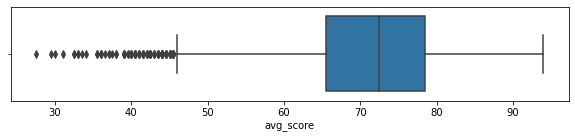

Avarage is : 71.26445347786812


In [84]:
plt.figure(figsize=(10, 10))

plt.subplot(511)

sns.boxplot(df["avg_score"])

plt.show()

print("Avarage is : " + str(df["avg_score"].mean()))

### THIS IS THE REPRESENTATION OF THE META SCORES

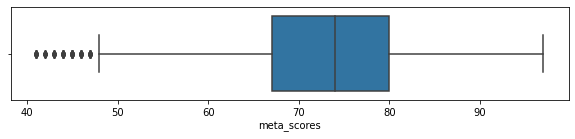

Avarage is : 73.06662149954833


In [85]:
plt.figure(figsize=(10, 10))

plt.subplot(511)

sns.boxplot(df["meta_scores"])

plt.show()
print("Avarage is : " + str(df["meta_scores"].mean()))

### THIS IS THE REPRESENTATION OF THE USER SCORES

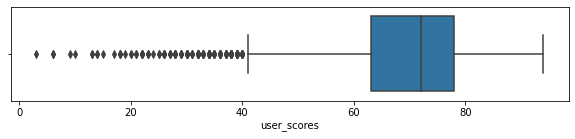

Avarage is : 69.4622854561879


In [87]:
plt.figure(figsize=(10, 10))

plt.subplot(511)

sns.boxplot(df["user_scores"])

plt.show()

print("Avarage is : " + str(df["user_scores"].mean()))

### NOTE:

We can see that the users on avarage rate games lower than website owners(meta_scores).
That's if the users dislike a game they give it very low ratings, after all they are the customers who buy the Video Games.
We can also see that minimum score is much lower than the meta scores.
Overall the user scores are essential and has to be weighed in because it can turn a game from successful to unsuccessful.

## SHOWING THE AMOUNTS OF GAMES IN EACH CATEGORY

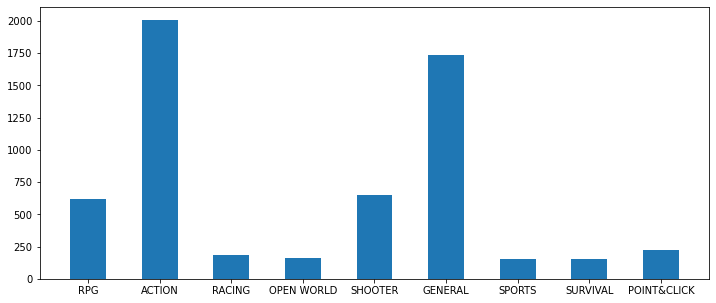

In [32]:
fig = plt.figure(figsize=(12,5))
names = ["RPG","ACTION","RACING","OPEN WORLD","SHOOTER","GENERAL","SPORTS" , "SURVIVAL", "POINT&CLICK"]
scores = [len(df.is_rpg[df.is_rpg == 1]),
          len(df.is_action[df.is_action == 1]),
          len(df.is_racing[df.is_racing == 1]),
          len(df.is_open_world[df.is_open_world == 1]),
          len(df.is_shooter[df.is_shooter == 1]),
          len(df.is_general[df.is_general == 1]),
          len(df.is_sports[df.is_sports == 1]),
          len(df.is_survival[df.is_survival == 1]),
          len(df.is_point_and_click[df.is_point_and_click == 1])]
positions= [0,1,2,3,4,5,6,7,8]

plt.bar(positions , scores , width=0.5 , )

plt.xticks(positions, names)

plt.show()



We can see that many games are categorised as Action Games.

SHOW HOW MANY GAMES RELEASED ON EACH MONTH OF THE YEAR

In [33]:
#COUNT 

jan=feb=mar=apr=may=jun=jul=aug=sep=octb=nov=dec=0;

for rd in df.release_dates:
    if "January" in rd:
        jan = jan+1
    elif "February" in rd:
        feb = feb+1
    elif "March" in rd:
        mar = mar+1
    elif "April" in rd:
        apr = apr+1
    elif "May" in rd:
        may = may+1;
    elif "June" in rd:
        jun = jun+1;
    elif "July" in rd:
        jul = jul+1;
    elif "August" in rd:
        aug = aug+1;
    elif "Septermber" in rd:
        sep = sep+1;
    elif "October" in rd:
        octb = octb+1;
    elif "November" in rd:
        nov = nov+1;
    elif "December" in rd:
        dec = dec+1;


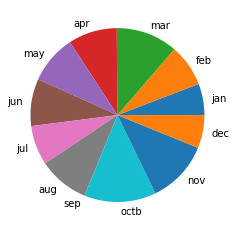

[230, 310, 453, 358, 359, 346, 291, 373, 0, 528, 461, 243]

In [34]:
#SHOW

games = [jan,feb,mar,apr,may,jun,jul,aug,sep,octb,nov,dec]
months = ["jan","feb","mar","apr","may","jun","jul","aug","sep","octb","nov","dec"]
#exp =[0,0,0,0,0,0,0,0,0,0,0,0]
plt.pie(games, labels=months)
plt.show()
games

### Most games are released on October.

## Correlation beween amount of platforms and success

<AxesSubplot:xlabel='amount_of_platforms'>

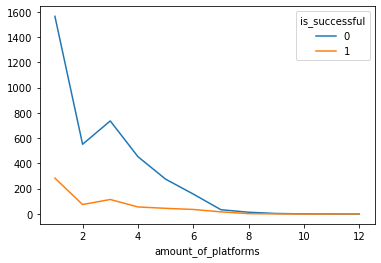

In [36]:
ct = pd.crosstab( df.amount_of_platforms , df.is_successful)
ct.plot()

### There's no correlation between the amount of platforms and the success level of a game.

# DATA ENGENEERING

### CREATING DATA FRAME df_numeric FOR MACHINE LEARNING ALGORITHMS
Splitting Month and Year of Release Date.
Removing non-categorical columns.
Turning categorical columns into numbers.

In [38]:
df_numeric = df.copy();
#remove platform
df_numeric = df_numeric.loc[:, df_numeric.columns!='platforms']
#remove Genres (already turned to numbers)
df_numeric = df_numeric.loc[:, df_numeric.columns!='all_genres']



df_numeric

,name,release_dates,meta_scores,user_scores,summeries,num_meta_critics,developer,publisher,amount_of_platforms,is_action,...,is_rpg,is_open_world,is_survival,is_shooter,is_point_and_click,is_strategy,is_sports,is_racing,avg_score,is_successful
0,Disco Elysium: The Final Cut,"March 30, 2021",97,82,Disco Elysium - The Final Cut is the definitiv...,11,ZA/UM,ZA/UM,8,0,...,1,0,0,0,0,0,0,0,89.5,1
1,Half-Life 2,"November 16, 2004",96,92,[Metacritic's 2004 PC Game of the Year] By ta...,81,Valve Software,VU Games,1,1,...,0,0,0,1,0,0,0,0,94.0,1
2,Grand Theft Auto V,"April 13, 2015",96,78,Los Santos: a sprawling sun-soaked metropolis ...,57,Rockstar North,Rockstar Games,7,1,...,0,1,0,0,0,0,0,0,87.0,1
3,The Orange Box,"October 10, 2007",96,91,Games included in The Orange Box compilation: ...,34,Valve Software,EA Games,3,1,...,0,0,0,1,0,0,0,0,93.5,1
4,Half-Life,"November 19, 1998",96,91,Half-Life combines great storytelling in the t...,24,Valve Software,Sierra Entertainment,2,1,...,0,0,0,1,0,0,0,0,93.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,Timeline (2000),"November 12, 2000",41,53,Make your way through a challenging and perilo...,13,Timeline Computer Entertainment,Eidos Interactive,1,1,...,0,0,0,0,0,0,0,0,47.0,0
4994,DARK,"July 3, 2013",41,42,DARK is a stealth action game with RPG element...,21,"Kalypso, Realmforge Studios",Kalypso,2,1,...,0,0,0,0,0,0,0,0,41.5,0
4995,Seduce Me,"January 2, 2013",41,33,Having happened upon an invite to a wealthy so...,12,?,No Reply Games,1,0,...,0,0,0,0,0,1,0,0,37.0,0
4996,Brigade E5: New Jagged Union,"October 17, 2006",41,68,Brigade E5: New Jagged Union is set in the fic...,9,Apeiron,Strategy First,1,0,...,0,0,0,0,0,1,0,0,54.5,0


## Developers and Publishers into categorical numbers each number represents unique developer/publisher

In [44]:

print("Developers:")
print(df["developer"].value_counts())
print("\n")
print("Publishers:")
print(df["publisher"].value_counts())
df_numeric["developer"] = pd.factorize(df.developer)[0]
df_numeric["publisher"] = pd.factorize(df.publisher)[0]

Developers:
Telltale Games            111
Maxis                      39
Codemasters                35
Ubisoft Montreal           33
Blizzard Entertainment     33
                         ... 
Vertigo Games               1
Legend Entertainment        1
Carlos Coronado             1
Necrophone                  1
Holistic Design, Inc.       1
Name: developer, Length: 2119, dtype: int64


Publishers:
Ubisoft                194
Electronic Arts        169
Telltale Games         109
Activision             101
Paradox Interactive     86
                      ... 
Terrible Toybox          1
The Farm 51              1
Charles University       1
X.D. Network Inc.        1
No Reply Games           1
Name: publisher, Length: 1109, dtype: int64


In [46]:
print("Developers:")
print(df_numeric["developer"].value_counts())
print("\n")
print("Publishers:")
print(df_numeric["publisher"].value_counts())

Developers:
80      111
23       39
88       35
25       33
11       33
       ... 
984       1
983       1
981       1
980       1
2118      1
Name: developer, Length: 2119, dtype: int64


Publishers:
24      194
9       169
58      109
21      101
39       86
       ... 
201       1
620       1
621       1
199       1
1108      1
Name: publisher, Length: 1109, dtype: int64


In [47]:
df_numeric

,name,release_dates,meta_scores,user_scores,summeries,num_meta_critics,developer,publisher,amount_of_platforms,is_action,...,is_rpg,is_open_world,is_survival,is_shooter,is_point_and_click,is_strategy,is_sports,is_racing,avg_score,is_successful
0,Disco Elysium: The Final Cut,"March 30, 2021",97,82,Disco Elysium - The Final Cut is the definitiv...,11,0,0,8,0,...,1,0,0,0,0,0,0,0,89.5,1
1,Half-Life 2,"November 16, 2004",96,92,[Metacritic's 2004 PC Game of the Year] By ta...,81,1,1,1,1,...,0,0,0,1,0,0,0,0,94.0,1
2,Grand Theft Auto V,"April 13, 2015",96,78,Los Santos: a sprawling sun-soaked metropolis ...,57,2,2,7,1,...,0,1,0,0,0,0,0,0,87.0,1
3,The Orange Box,"October 10, 2007",96,91,Games included in The Orange Box compilation: ...,34,1,3,3,1,...,0,0,0,1,0,0,0,0,93.5,1
4,Half-Life,"November 19, 1998",96,91,Half-Life combines great storytelling in the t...,24,1,4,2,1,...,0,0,0,1,0,0,0,0,93.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,Timeline (2000),"November 12, 2000",41,53,Make your way through a challenging and perilo...,13,2115,27,1,1,...,0,0,0,0,0,0,0,0,47.0,0
4994,DARK,"July 3, 2013",41,42,DARK is a stealth action game with RPG element...,21,2116,413,2,1,...,0,0,0,0,0,0,0,0,41.5,0
4995,Seduce Me,"January 2, 2013",41,33,Having happened upon an invite to a wealthy so...,12,95,1108,1,0,...,0,0,0,0,0,1,0,0,37.0,0
4996,Brigade E5: New Jagged Union,"October 17, 2006",41,68,Brigade E5: New Jagged Union is set in the fic...,9,2117,95,1,0,...,0,0,0,0,0,1,0,0,54.5,0


In [48]:
#deal with release dates
# we split this string column into 2 numeric columns, year and month
year_only = []
month_only = []
for string in df.release_dates:
    year_only.append(string.split(",")[1].strip())
    month_only.append(string.split(" ")[0].strip())
df_numeric["year"] = year_only
df_numeric["month"] = month_only
#turn month into categorical numerics
df_numeric["month"] = pd.factorize(df_numeric.month)[0]
df_numeric = df_numeric.loc[:, df_numeric.columns!='release_dates']

In [49]:
df_numeric = df_numeric.loc[:, df_numeric.columns!='name']
df_numeric = df_numeric.loc[:, df_numeric.columns!='summeries']

df_numeric

,meta_scores,user_scores,num_meta_critics,developer,publisher,amount_of_platforms,is_action,is_general,is_rpg,is_open_world,is_survival,is_shooter,is_point_and_click,is_strategy,is_sports,is_racing,avg_score,is_successful,year,month
0,97,82,11,0,0,8,0,1,1,0,0,0,0,0,0,0,89.5,1,2021,0
1,96,92,81,1,1,1,1,0,0,0,0,1,0,0,0,0,94.0,1,2004,1
2,96,78,57,2,2,7,1,0,0,1,0,0,0,0,0,0,87.0,1,2015,2
3,96,91,34,1,3,3,1,0,0,0,0,1,0,0,0,0,93.5,1,2007,3
4,96,91,24,1,4,2,1,0,0,0,0,1,0,0,0,0,93.5,1,1998,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,41,53,13,2115,27,1,1,1,0,0,0,0,0,0,0,0,47.0,0,2000,1
4994,41,42,21,2116,413,2,1,1,0,0,0,0,0,0,0,0,41.5,0,2013,11
4995,41,33,12,95,1108,1,0,1,0,0,0,0,0,1,0,0,37.0,0,2013,6
4996,41,68,9,2117,95,1,0,1,0,0,0,0,0,1,0,0,54.5,0,2006,3


# MACHINE LEARNING

## 1.
### Running a machine learning algorithm only on the summeries to see it's role in determining if a game is successful.

## Multinomial Naive Bayes

Using Multinomial Naive Bayes, on all games' summeries.
We made the computer read all a game's summery and from that decide if it's a successful games or not.

In [50]:
#importing and using Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer();

x = cv.fit_transform(df.summeries)
a = x.toarray()
a
# a is an array
# each row counts the instances if each word from one game's summery

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [51]:
#splitting the array into train and test
X_train, X_test , y_train, y_test = train_test_split(x , df['is_successful'] , test_size=0.2,random_state=300)

from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(X_train , y_train)

In [52]:
#0 - unsuccessful
#1 - unsuccessful
print(classifier.predict(X_train))

[0 0 0 ... 0 0 0]


In [53]:
print(y_train.values)

[0 0 0 ... 0 0 0]


In [54]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
pred = classifier.predict(X_train)
print("THE ACCURACY SCORE FOR MultinomialNB IS(ON TRAIN):")
print(accuracy_score(y_train , pred))

THE ACCURACY SCORE FOR MultinomialNB IS(ON TRAIN):
0.9195369847543761


In [58]:
pred = classifier.predict(X_test)
print(pred)

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [59]:
print(y_test.values)

[0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 

In [60]:
print("THE ACCURACY SCORE FOR MultinomialNB IS(ON TEST):")
print(accuracy_score(y_test , pred))


THE ACCURACY SCORE FOR MultinomialNB IS(ON TEST):
0.8498871331828443


### The summeries make a great prediction!

## 2.
### Using the Dataframe's numeric and categorical columns (Logistic Regression) 

## Logistic Regression

In [61]:
df_numeric

,meta_scores,user_scores,num_meta_critics,developer,publisher,amount_of_platforms,is_action,is_general,is_rpg,is_open_world,is_survival,is_shooter,is_point_and_click,is_strategy,is_sports,is_racing,avg_score,is_successful,year,month
0,97,82,11,0,0,8,0,1,1,0,0,0,0,0,0,0,89.5,1,2021,0
1,96,92,81,1,1,1,1,0,0,0,0,1,0,0,0,0,94.0,1,2004,1
2,96,78,57,2,2,7,1,0,0,1,0,0,0,0,0,0,87.0,1,2015,2
3,96,91,34,1,3,3,1,0,0,0,0,1,0,0,0,0,93.5,1,2007,3
4,96,91,24,1,4,2,1,0,0,0,0,1,0,0,0,0,93.5,1,1998,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,41,53,13,2115,27,1,1,1,0,0,0,0,0,0,0,0,47.0,0,2000,1
4994,41,42,21,2116,413,2,1,1,0,0,0,0,0,0,0,0,41.5,0,2013,11
4995,41,33,12,95,1108,1,0,1,0,0,0,0,0,1,0,0,37.0,0,2013,6
4996,41,68,9,2117,95,1,0,1,0,0,0,0,0,1,0,0,54.5,0,2006,3


In [62]:
#splitting
y = df_numeric["is_successful"]
X = df_numeric.copy()

X = X.loc[:, X.columns!='meta_scores']
X = X.loc[:, X.columns!='user_scores']
X = X.loc[:, X.columns!='avg_score']
X = X.loc[:, X.columns!='is_successful']

X['year'] = X['year'].astype(int)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 687)



In [63]:

X

,num_meta_critics,developer,publisher,amount_of_platforms,is_action,is_general,is_rpg,is_open_world,is_survival,is_shooter,is_point_and_click,is_strategy,is_sports,is_racing,year,month
0,11,0,0,8,0,1,1,0,0,0,0,0,0,0,2021,0
1,81,1,1,1,1,0,0,0,0,1,0,0,0,0,2004,1
2,57,2,2,7,1,0,0,1,0,0,0,0,0,0,2015,2
3,34,1,3,3,1,0,0,0,0,1,0,0,0,0,2007,3
4,24,1,4,2,1,0,0,0,0,1,0,0,0,0,1998,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,13,2115,27,1,1,1,0,0,0,0,0,0,0,0,2000,1
4994,21,2116,413,2,1,1,0,0,0,0,0,0,0,0,2013,11
4995,12,95,1108,1,0,1,0,0,0,0,0,1,0,0,2013,6
4996,9,2117,95,1,0,1,0,0,0,0,0,1,0,0,2006,3


In [64]:
y

0       1
1       1
2       1
3       1
4       1
       ..
4993    0
4994    0
4995    0
4996    0
4997    0
Name: is_successful, Length: 4428, dtype: int64

In [65]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [66]:
model.fit(X_train, y_train)

LogisticRegression()

In [67]:
y_predicted = model.predict(X_train)
y_predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [68]:
y_train.values

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [69]:
print("Accuracy score for train")

model.score(X_train,y_train)

Accuracy score for train


0.8599521658251396

In [70]:
y_predicted = model.predict(X_test)

In [71]:
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [72]:
y_test.values

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [73]:
print("Accuracy score for test")
model.score(X_test,y_test)

Accuracy score for test


0.8661654135338346

## Random Forests

Using another classification method.

In [74]:
import sklearn as sk
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
RF.fit(X_train, y_train)
pred = RF.predict(X_test)

print("FOR TEST:")


print("PREDICTION:")
print(pred)

print("ANSWERS:")
print(y_test.values)

print("ACCURACY (TEST):")
RF.score(X_test,y_test)

FOR TEST:
PREDICTION:
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 

0.8842105263157894

In [89]:
pred = RF.predict(X_train)

print("FOR TRAIN:")


print("PREDICTION:")
print(pred)

print("ANSWERS:")
print(y_train.values)

print("ACCURACY(TRAIN):")
RF.score(X_train,y_train)

FOR TRAIN:
PREDICTION:
[0 0 0 ... 0 0 0]
ANSWERS:
[0 0 0 ... 0 1 0]
ACCURACY(TRAIN):


0.9216051023119851

### The other columns make even better predicion than the summeries alone!

# CONCLUTIONS:

We managed to predict weather a game will be successful or not.

The accuracy of Multinomial Naive Bayes on the summeries alone was : 85% correct!

The accuracy of Logistic Regression on everything else was : 86% correct!

The accuracy of Random Forests on everything else was : 88% correct!

This project can help developers and publishers choose ideas to invest in :)